# Data validation

Sensor data quality plays a vital role in Internet of Things (IoT) applications as they are rendered useless if the data quality is bad.

The second most commonly found error in sensor data is missing data. missing data is caused by various factors such as unstable wireless connection due to network congestion, sensor device outages due to its limited battery life, environmental interferences e.g. human blockage, walls, and weather conditions, and malicious attacks. There are cases where sensor data is missing for extended periods of time, which might lead to incorrect decision making on the consumer side. 


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sbn
sbn.set()

## Load the PHMDataset2018 dataset

In [3]:
from ceruleo.dataset.catalog.PHMDataset2018 import PHMDataset2018, FailureType

2022-08-08 15:01:30.212158: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-08 15:01:30.243887: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-08 15:01:30.243895: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
dataset = PHMDataset2018(
    tools=['01_M01', '04_M01']
)

Downloading...
From: https://drive.google.com/uc?id=15Jx9Scq9FqpIGn8jbAQB_lcHSXvIoPzb
To: /home/luciano/.ceruleo/data/phm_data_challenge_2018/raw/phm_data_challenge_2018.tar.gz
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5.36G/5.36G [01:42<00:00, 52.3MB/s]


  0%|          | 0/70 [00:00<?, ?it/s]

Processing files:   0%|          | 0/20 [00:00<?, ?it/s]

### Create a transformer for a dataset

In [36]:
from ceruleo.dataset.analysis.numerical_features import analysis
from ceruleo.transformation.functional.transformers import Transformer
from ceruleo.transformation.features.selection import ByNameFeatureSelector, ByTypeFeatureSelector
from ceruleo.iterators.iterators import RelativeToEnd
from ceruleo.transformation.features.slicing import SliceRows
from ceruleo.transformation.functional.pipeline.pipeline import make_pipeline

In [37]:
transformer = Transformer(
    pipelineX=ByTypeFeatureSelector(type_='float64'), 
    pipelineY=ByNameFeatureSelector(features=['RUL'])
)

transformed_dataset = transformer.fit_map(dataset)

## Sample rate

In [38]:
from ceruleo.dataset.analysis.sample_rate import sample_rate, sample_rate_summary

(0.0, 10.0)

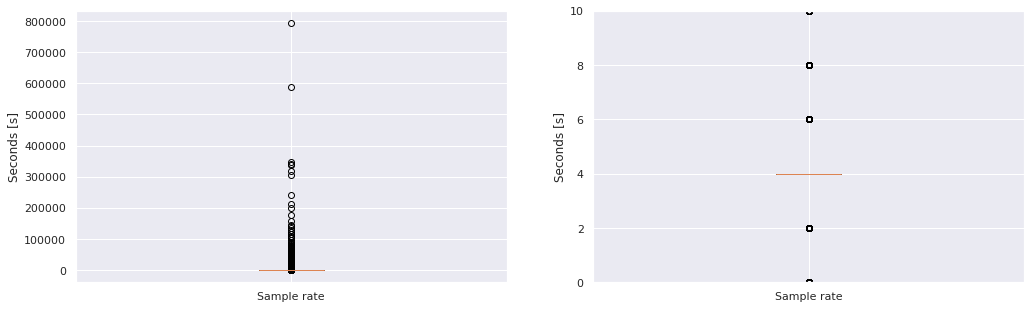

In [39]:
sample_rates = sample_rate(dataset)
fig, ax = plt.subplots(1, 2, figsize=(17, 5))
ax[0].boxplot(sample_rates, labels=['Sample rate'])
ax[0].set_ylabel('Seconds [s]')

ax[1].boxplot(sample_rates, labels=['Sample rate'])
ax[1].set_ylabel('Seconds [s]')
ax[1].set_ylim(0, 10)

In [40]:
sample_rate_summary(dataset)

,Mean sample rate,Std sample rate,Mode sample rate
Dataset,10.107057,607.609879,4.0


## Missing values
Usually, the information of sensors is incomplete and this causes numerous missing values in the features. This library provides some useful functions to analyse the proportion of the missing values for each feature for each life. In some cases, if the feature values are missing in multiple lives, that feature can be discarded.

In [41]:
analysis(transformed_dataset, what_to_compute=['null'])

,null Mean,null Max,null Min
recipe_step,(0.3+/-1.6)e-06,0.000007,0.0
IONGAUGEPRESSURE,0.0+/-0,0.0,0.0
ETCHBEAMVOLTAGE,0.0+/-0,0.0,0.0
ETCHBEAMCURRENT,0.0+/-0,0.0,0.0
ETCHSUPPRESSORVOLTAGE,0.0+/-0,0.0,0.0
ETCHSUPPRESSORCURRENT,0.0+/-0,0.0,0.0
FLOWCOOLFLOWRATE,0.0+/-0,0.0,0.0
FLOWCOOLPRESSURE,0.0+/-0,0.0,0.0
ETCHGASCHANNEL1READBACK,0.0+/-0,0.0,0.0
ETCHPBNGASREADBACK,0.0+/-0,0.0,0.0


## Pairwise correlation

In [42]:
from ceruleo.dataset.analysis.correlation import correlation_analysis

In [43]:
(correlation_analysis(transformed_dataset, corr_threshold=0.7)
 .sort_values(by='Abs mean correlation', ascending=False)
 .head(15)
)

,,Mean Correlation,Std Correlation,Percentage of lives with a high correlation,Abs mean correlation,Std mean correlation,Max correlation,Min correlation
Feature 1,Feature 2,,,,,,,
ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,0.971877,0.014762,100.000000,0.971877,0.014762,0.981271,0.909530
ETCHBEAMCURRENT,ETCHSUPPRESSORCURRENT,0.967101,0.016011,100.000000,0.967101,0.016011,0.988887,0.926967
ETCHGASCHANNEL1READBACK,IONGAUGEPRESSURE,0.960183,0.011650,100.000000,0.960183,0.011650,0.981877,0.935980
ETCHBEAMVOLTAGE,ETCHSUPPRESSORCURRENT,0.959192,0.018357,100.000000,0.959192,0.018357,0.980356,0.907479
ETCHBEAMCURRENT,ETCHBEAMVOLTAGE,0.959190,0.017303,100.000000,0.959190,0.017303,0.979995,0.896134
ETCHPBNGASREADBACK,IONGAUGEPRESSURE,0.949128,0.033483,100.000000,0.949128,0.033483,0.972288,0.807029
ETCHAUX2SOURCETIMER,ETCHAUXSOURCETIMER,0.818763,0.501544,90.909091,0.946622,0.122790,1.000000,-0.772497
ETCHPBNGASREADBACK,FLOWCOOLFLOWRATE,0.930555,0.017407,100.000000,0.930555,0.017407,0.963472,0.885555
ETCHGASCHANNEL1READBACK,FLOWCOOLFLOWRATE,0.909351,0.021296,100.000000,0.909351,0.021296,0.954520,0.867820


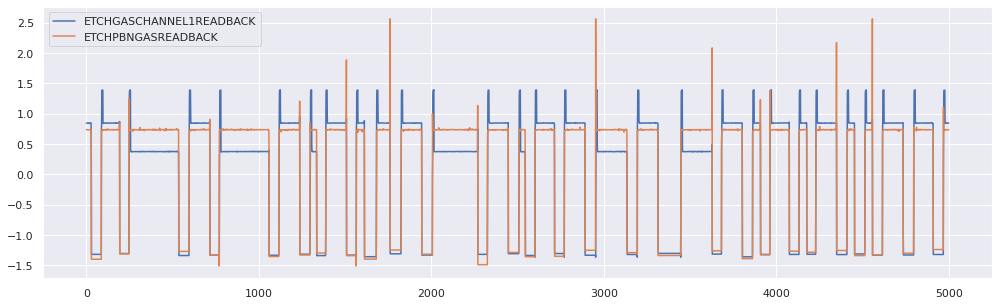

In [44]:
fig, ax = plt.subplots(figsize=(17, 5))
ax.plot(dataset[0]['ETCHGASCHANNEL1READBACK'].values[-5000:], label='ETCHGASCHANNEL1READBACK')
ax.plot(dataset[0]['ETCHPBNGASREADBACK'].values[-5000:], label='ETCHPBNGASREADBACK')
ax.legend()

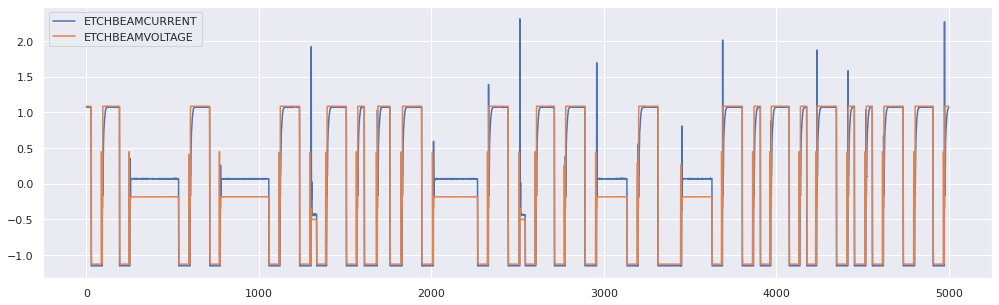

In [45]:
fig, ax = plt.subplots(figsize=(17, 5))
ax.plot(dataset[0]['ETCHBEAMCURRENT'].values[-5000:], label='ETCHBEAMCURRENT')
ax.plot(dataset[0]['ETCHBEAMVOLTAGE'].values[-5000:], label='ETCHBEAMVOLTAGE')
ax.legend()

In [46]:
(correlation_analysis(dataset, corr_threshold=0.7)
 .sort_values(by='Abs mean correlation', ascending=False)
 .head(15)
)

,,Mean Correlation,Std Correlation,Percentage of lives with a high correlation,Abs mean correlation,Std mean correlation,Max correlation,Min correlation
Feature 1,Feature 2,,,,,,,
RUL,runnum,-0.975467,0.055988,100.000000,0.975467,0.055988,-0.732006,-0.999502
ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,0.971877,0.014762,100.000000,0.971877,0.014762,0.981271,0.909530
ETCHBEAMCURRENT,ETCHSUPPRESSORCURRENT,0.967101,0.016011,100.000000,0.967101,0.016011,0.988887,0.926967
ETCHGASCHANNEL1READBACK,IONGAUGEPRESSURE,0.960183,0.011650,100.000000,0.960183,0.011650,0.981877,0.935980
ETCHBEAMVOLTAGE,ETCHSUPPRESSORCURRENT,0.959192,0.018357,100.000000,0.959192,0.018357,0.980356,0.907479
ETCHBEAMCURRENT,ETCHBEAMVOLTAGE,0.959190,0.017303,100.000000,0.959190,0.017303,0.979995,0.896134
ETCHPBNGASREADBACK,IONGAUGEPRESSURE,0.949128,0.033483,100.000000,0.949128,0.033483,0.972288,0.807029
ETCHAUX2SOURCETIMER,ETCHAUXSOURCETIMER,0.818763,0.501544,90.909091,0.946622,0.122790,1.000000,-0.772497
ETCHPBNGASREADBACK,FLOWCOOLFLOWRATE,0.930555,0.017407,100.000000,0.930555,0.017407,0.963472,0.885555


## Feature distribution

In [47]:
from ceruleo.dataset.analysis.distribution import features_divergeces

In [93]:
columns = ['IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT',
       'ETCHSUPPRESSORVOLTAGE', ]
d = features_divergeces(dataset, columns=columns)

In [94]:
d.sort_values(by='KL', ascending=False).head(45)

,Life 1,Life 2,W,KL,feature
307,3,20,0.021240,4.213249,ETCHBEAMVOLTAGE
538,3,20,0.014373,4.085514,ETCHBEAMCURRENT
405,10,20,0.015285,3.923455,ETCHBEAMVOLTAGE
382,8,20,0.012065,3.758693,ETCHBEAMVOLTAGE
306,3,19,0.020164,3.753140,ETCHBEAMVOLTAGE
450,16,20,0.011403,3.701459,ETCHBEAMVOLTAGE
432,13,20,0.011582,3.675685,ETCHBEAMVOLTAGE
424,12,20,0.011430,3.645793,ETCHBEAMVOLTAGE
415,11,20,0.014453,3.641021,ETCHBEAMVOLTAGE
324,4,20,0.014220,3.628268,ETCHBEAMVOLTAGE


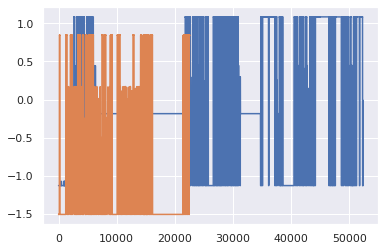

In [95]:
fig, ax = plt.subplots()
ax.plot(dataset[14]['ETCHBEAMVOLTAGE'].values)
ax.plot(dataset[20]['ETCHBEAMVOLTAGE'].values)

(array([1.61313358, 0.00451479, 0.00240789, 1.04547429, 0.00255838,
        0.01128697, 0.        , 0.71995811]),
 array([-1.50686189, -1.21268662, -0.91851135, -0.62433608, -0.33016081,
        -0.03598554,  0.25818973,  0.552365  ,  0.84654027]),
 <BarContainer object of 8 artists>)

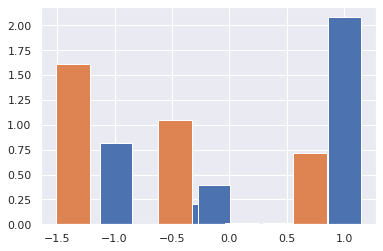

In [102]:
fig, ax = plt.subplots()
ax.hist(dataset[3]['ETCHBEAMVOLTAGE'], 
        bins=8,
       density=True)
ax.hist(dataset[20]['ETCHBEAMVOLTAGE'], 
        bins=8,
       density=True)